# Exploratory Data Analysis
## Projecting Food Insecurity Rates in 2020
### Khyatee Desai

In [183]:
# import necessary libraries
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
import pickle
warnings.filterwarnings('ignore')

In [184]:
with open('../pickled/feature_engineered_data.pickle', "rb") as input_file:
    df = pickle.load(input_file) 
df.head(2)

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,TOT_LATINX,State/County,FI Rate,Low Threshold Type,High Threshold Type,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_latinX,Percent_working,Total_food_retail,Food_retail_per_person,Rent^2,Houseless_rate^2,Sheltered_rate^2,Unsheltered_rate^2,TOT_POP^2,Cost Per Meal^2,Num_wholesale^2,Num_restaraunts^2,Num_grocery^2,Unemployment_rate^2,Percent_male^2,Percent_female^2,Percent_white^2,Percent_Black^2,Percent_native^2,Percent_asian^2,Percent_pacific^2,Percent_working^2,Total_food_retail^2,Food_retail_per_person^2
0,01073,1019.995960,2014,AL-500,0.001396,0.000961,0.000435,Alabama,Jefferson County,659972.0,312491.0,347481.0,355635.0,284082.0,2029.0,10378.0,347.0,24099.0,"Jefferson County, AL",0.197,SNAP,Other Nutrition Program,2.93,483.0,2693.0,400.0,312131.0,292505.0,19626.0,6.3,0.473491,0.526509,0.538864,0.430446,0.003074,0.015725,0.000526,0.036515,0.472946,3576.0,0.005418,1.040392e+06,0.000002,9.232983e-07,1.890169e-07,4.355630e+11,8.5849,233289.0,7252249.0,160000.0,39.69,0.224194,0.277211,0.290374,0.185283,0.000009,0.000247,2.764445e-07,0.223678,12787776.0,0.000029
19,01117,1229.755051,2014,AL-500,0.001396,0.000961,0.000435,Alabama,Shelby County,206280.0,100304.0,105976.0,174094.0,24247.0,805.0,4403.0,101.0,11872.0,"Shelby County, AL",0.105,SNAP,Other Nutrition Program,3.37,1.0,743.0,2706.0,107208.0,102400.0,4808.0,4.5,0.486252,0.513748,0.843969,0.117544,0.003902,0.021345,0.000490,0.057553,0.519721,3450.0,0.016725,1.512297e+06,0.000002,9.232983e-07,1.890169e-07,4.255144e+10,11.3569,1.0,552049.0,7322436.0,20.25,0.236441,0.263937,0.712284,0.013817,0.000015,0.000456,2.397334e-07,0.270110,11902500.0,0.000280


# Question 1: How have features changed over time?

In [185]:
def barchart(df, features, title=None):
    plot_df = df.groupby("Year")[features].mean().dropna().reset_index()
    for feat in features:
        plot_df[feat] =(plot_df[feat] - min(plot_df[feat])) / (max(plot_df[feat]) - min(plot_df[feat]))
    
    plot_df.plot(by='Year',kind='bar',fontsize=16,rot='horizontal',figsize=(25,10));
    plt.xlabel('Year', fontdict={'fontsize':24});
    plt.ylabel('Scaled Count', fontdict={'fontsize':24});
    plt.xticks(fontsize=22);
    plt.yticks(fontsize=22);
    plt.legend(prop=dict(size=22));
    plt.title(title, fontdict={'fontsize':30});

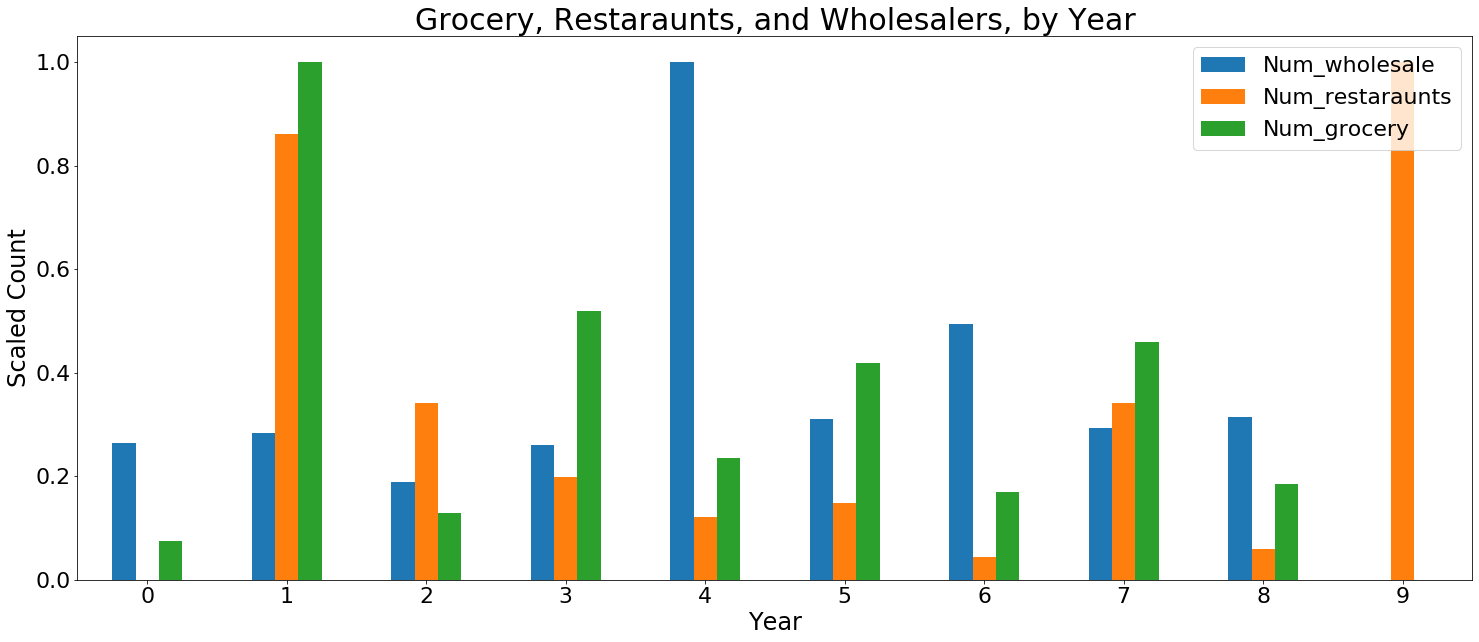

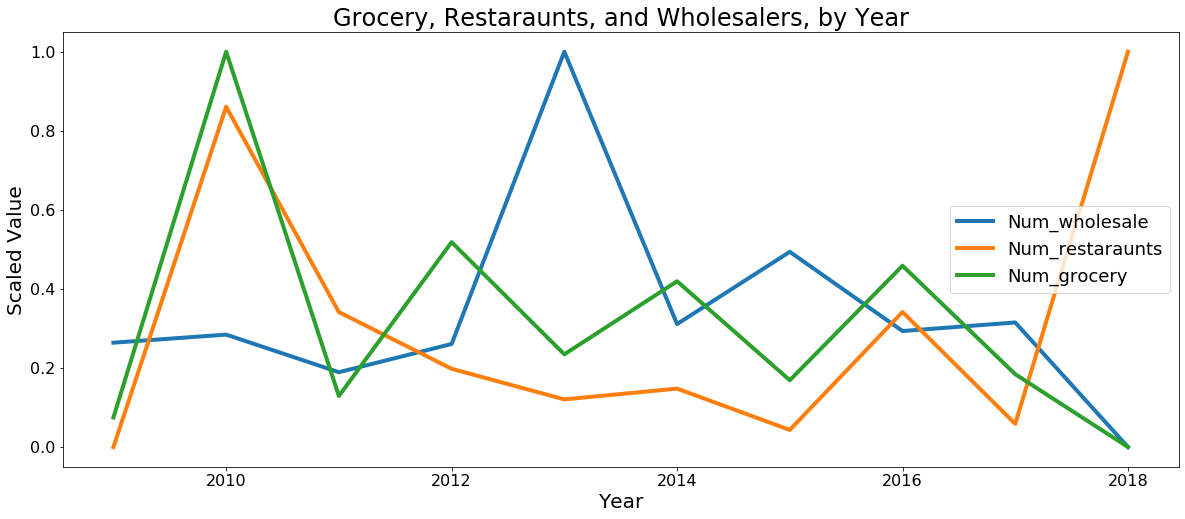

In [186]:
features = ['Num_wholesale','Num_restaraunts', 'Num_grocery']
barchart(df,features, title='Grocery, Restaraunts, and Wholesalers, by Year')
lineplot(df, features ,title='Grocery, Restaraunts, and Wholesalers, by Year')

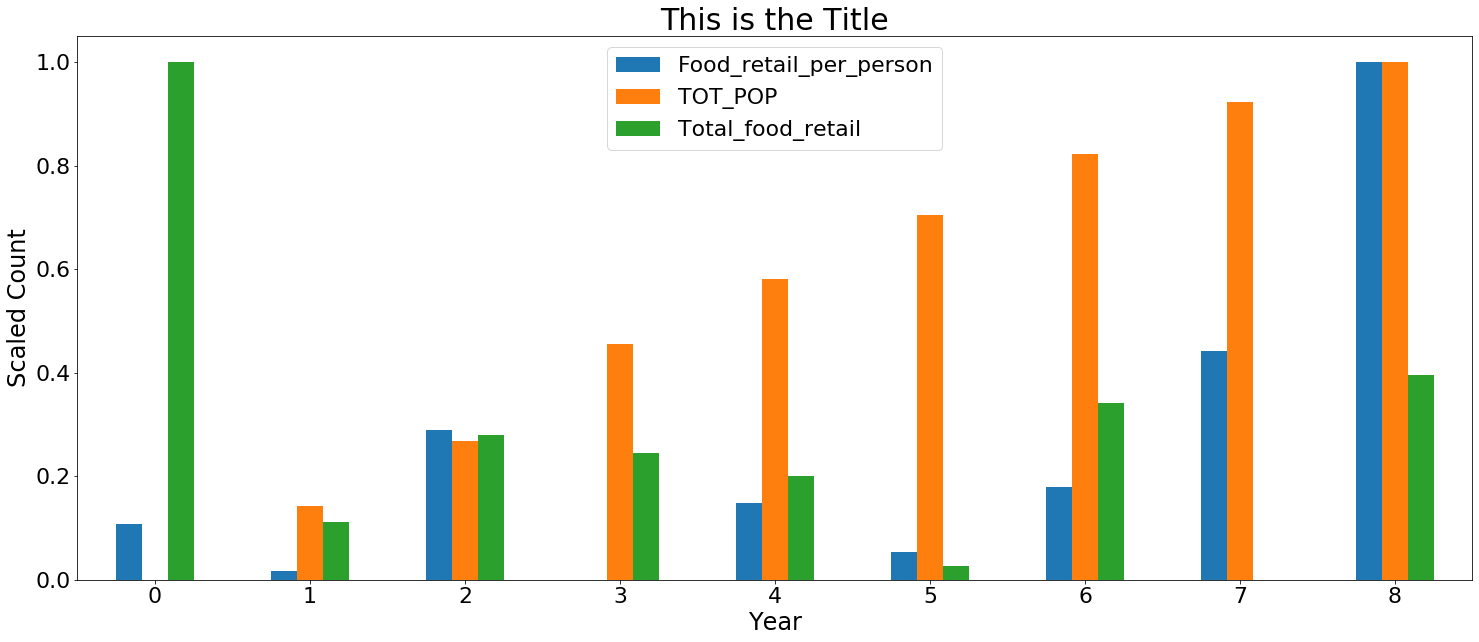

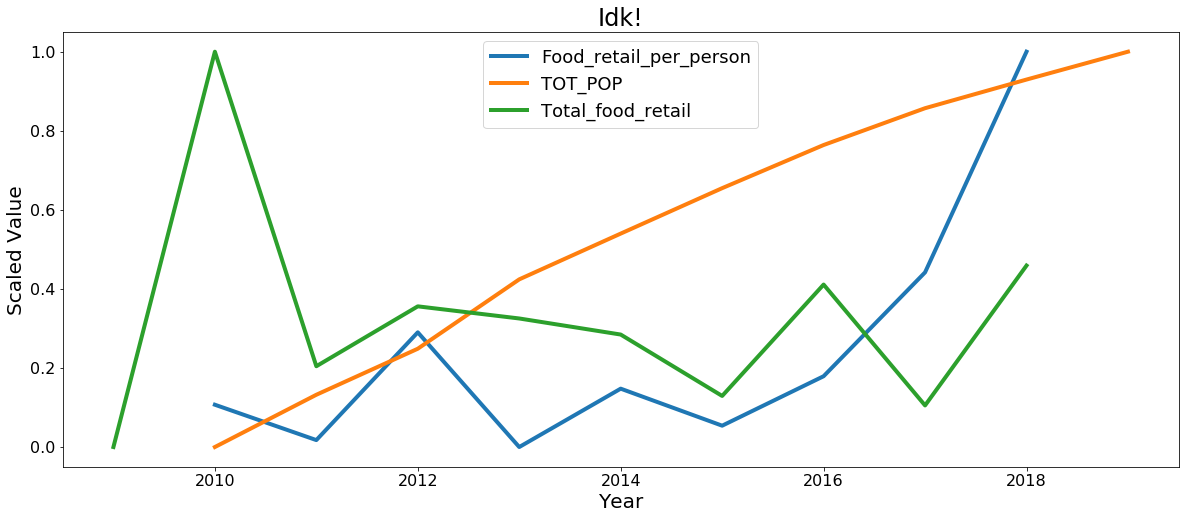

In [187]:
features = ['Food_retail_per_person','TOT_POP','Total_food_retail']
barchart(df,features, title='This is the Title')
lineplot(df, features ,title='Idk!')

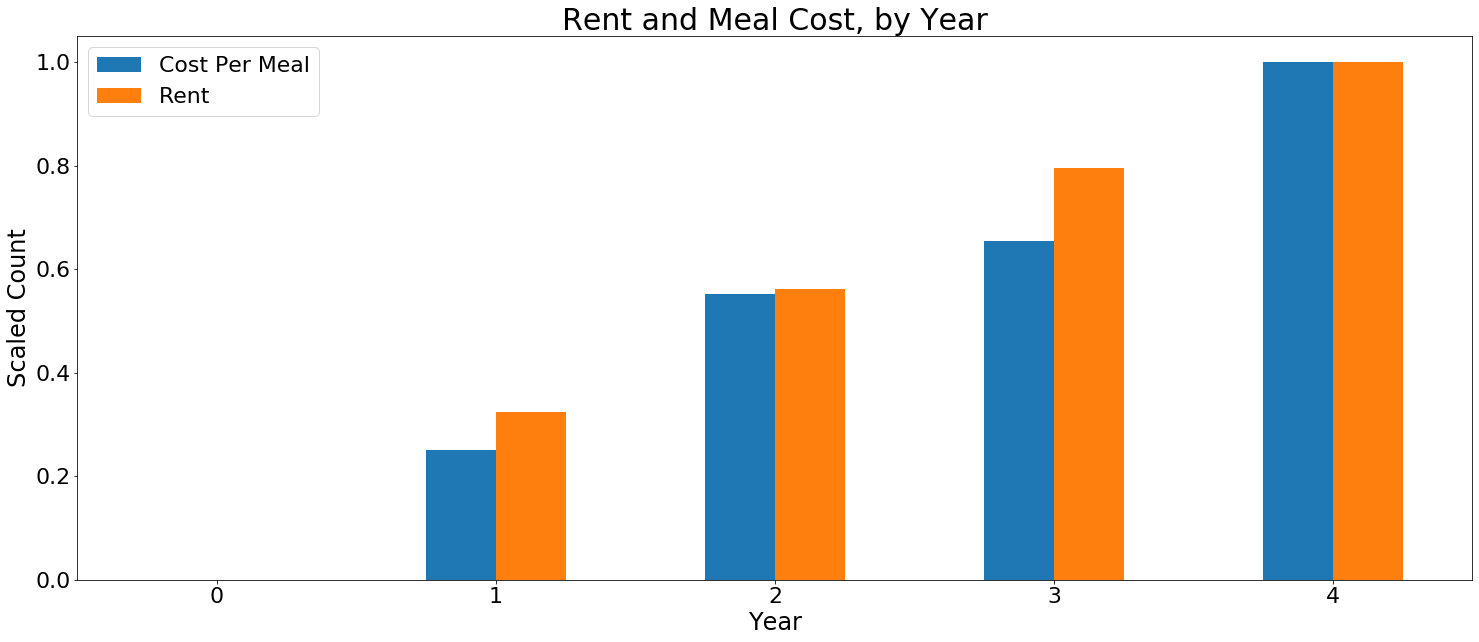

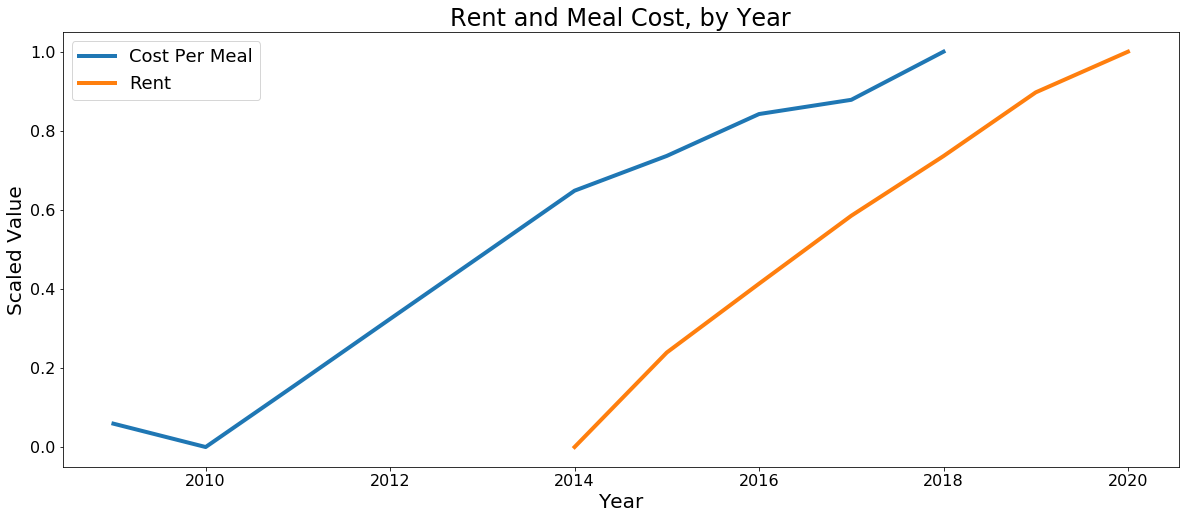

In [188]:
barchart(df, ['Cost Per Meal','Rent'], title='Rent and Meal Cost, by Year')
lineplot(df, ['Cost Per Meal','Rent'],title='Rent and Meal Cost, by Year')


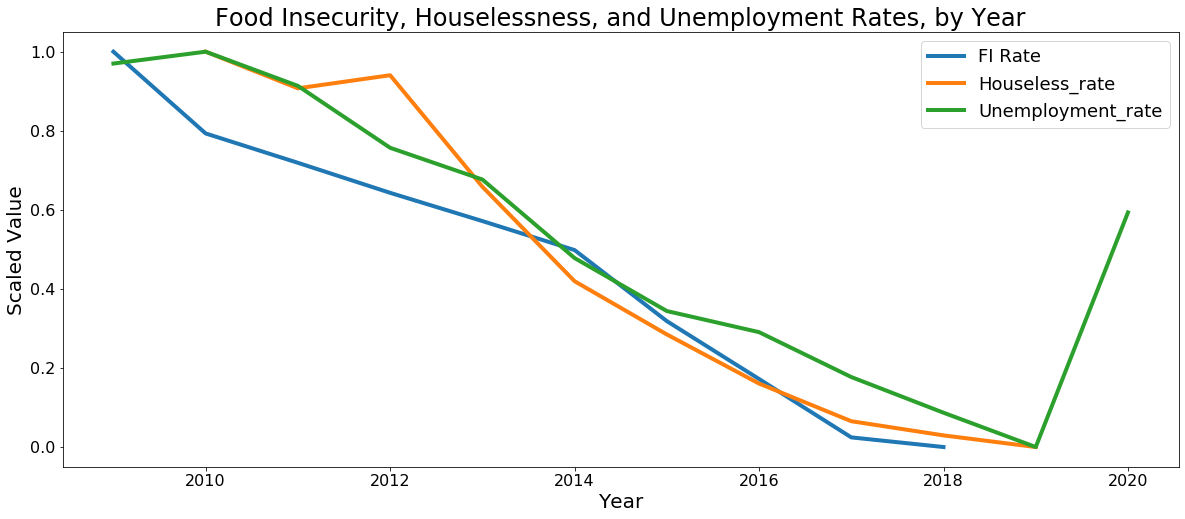

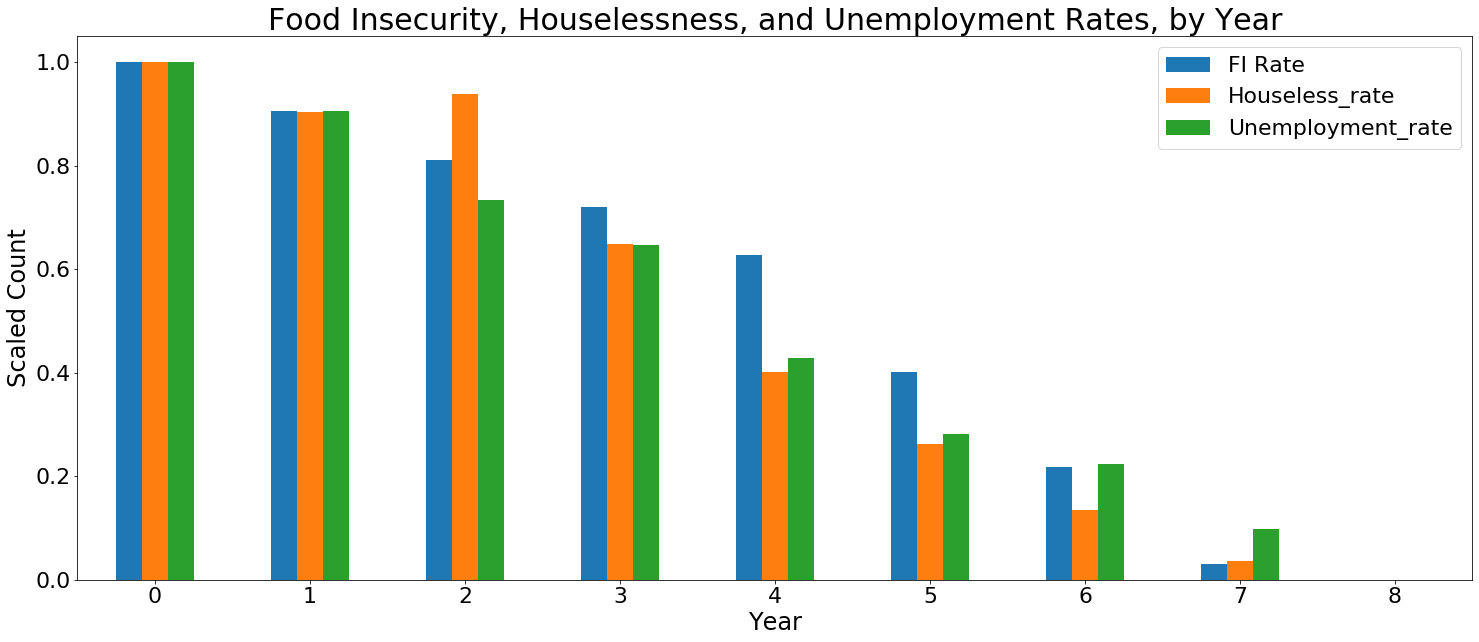

In [189]:
lineplot(df, ['FI Rate','Houseless_rate','Unemployment_rate'], title='Food Insecurity, Houselessness, and Unemployment Rates, by Year')
barchart(df, ['FI Rate','Houseless_rate','Unemployment_rate'], title='Food Insecurity, Houselessness, and Unemployment Rates, by Year')


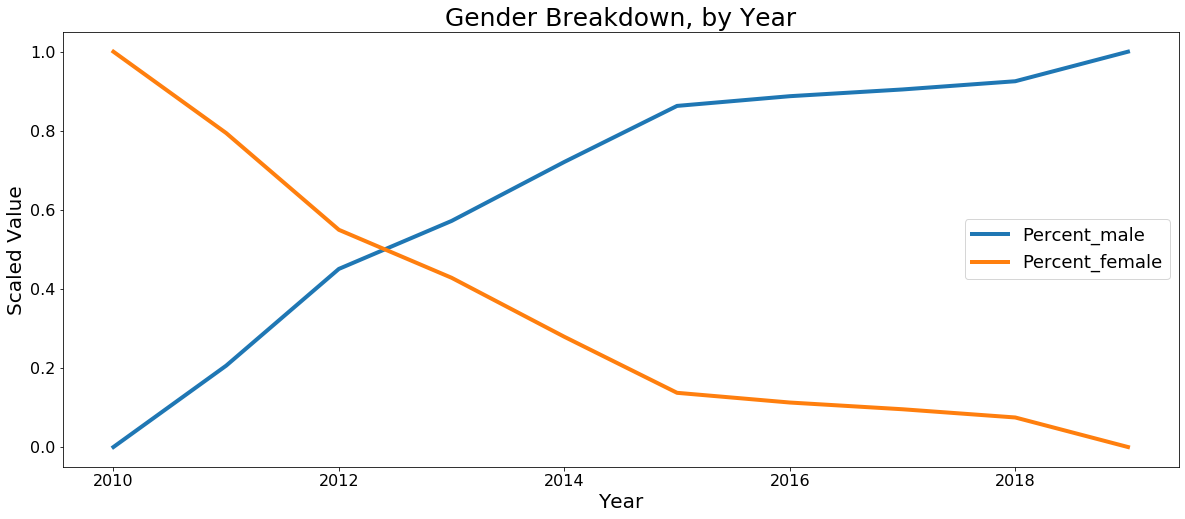

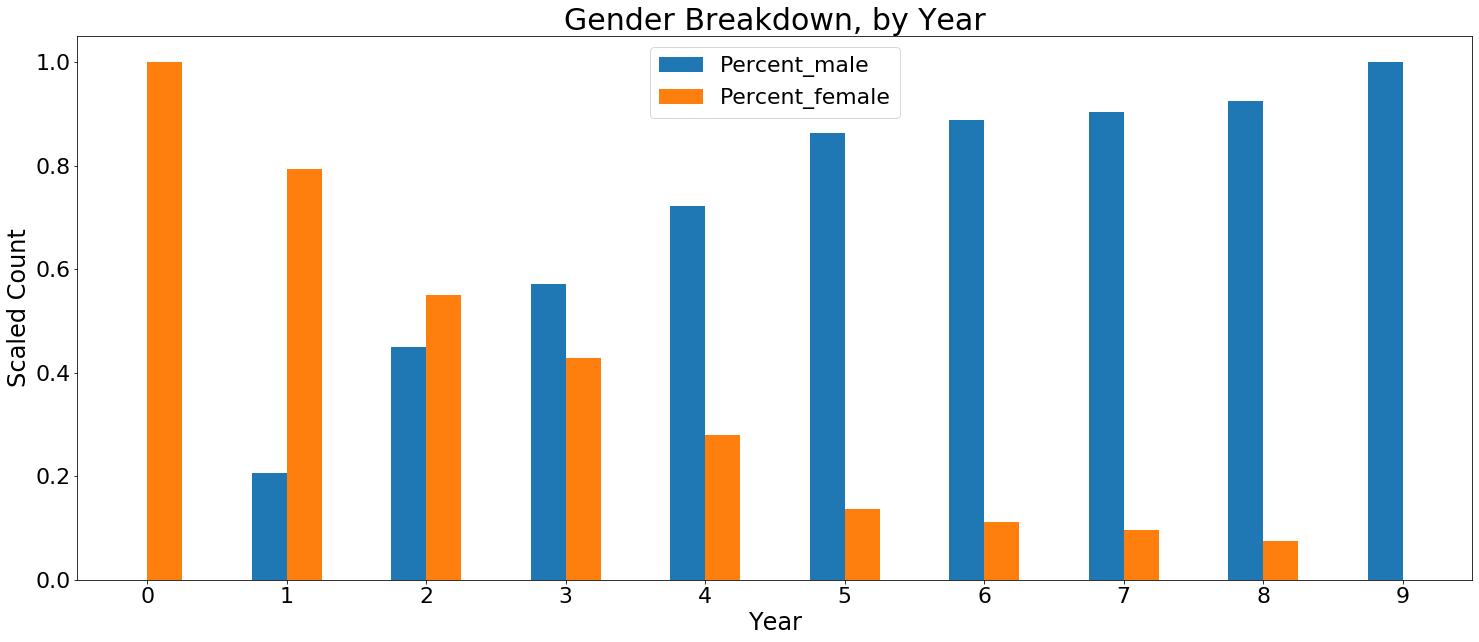

In [143]:
lineplot(df, ['Percent_male', 'Percent_female'], title='Gender Breakdown, by Year')
barchart(df, ['Percent_male', 'Percent_female'], title='Gender Breakdown, by Year')

In [144]:
def lineplot(df, features, title=None):

    plt.figure(figsize=(20, 8));

    for feat in features:
        x = df.groupby("Year")[feat].mean().reset_index().dropna()
        y = (x[feat] - min(x[feat])) / (max(x[feat]) - min(x[feat]))
        ax= sns.lineplot(x=x['Year'].astype(int), y= y, label=feat, linewidth = 4)
    ax.set_title(title, fontsize=24);
    ax.set_ylabel('Scaled Value', fontsize=20);
    ax.set_xlabel('Year', fontsize=20);
    ax.legend(prop=dict(size=18));
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);


# Analysis Question 2: Which geographic areas have the highest rates of unemployment, houselessness, food insecurity?
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

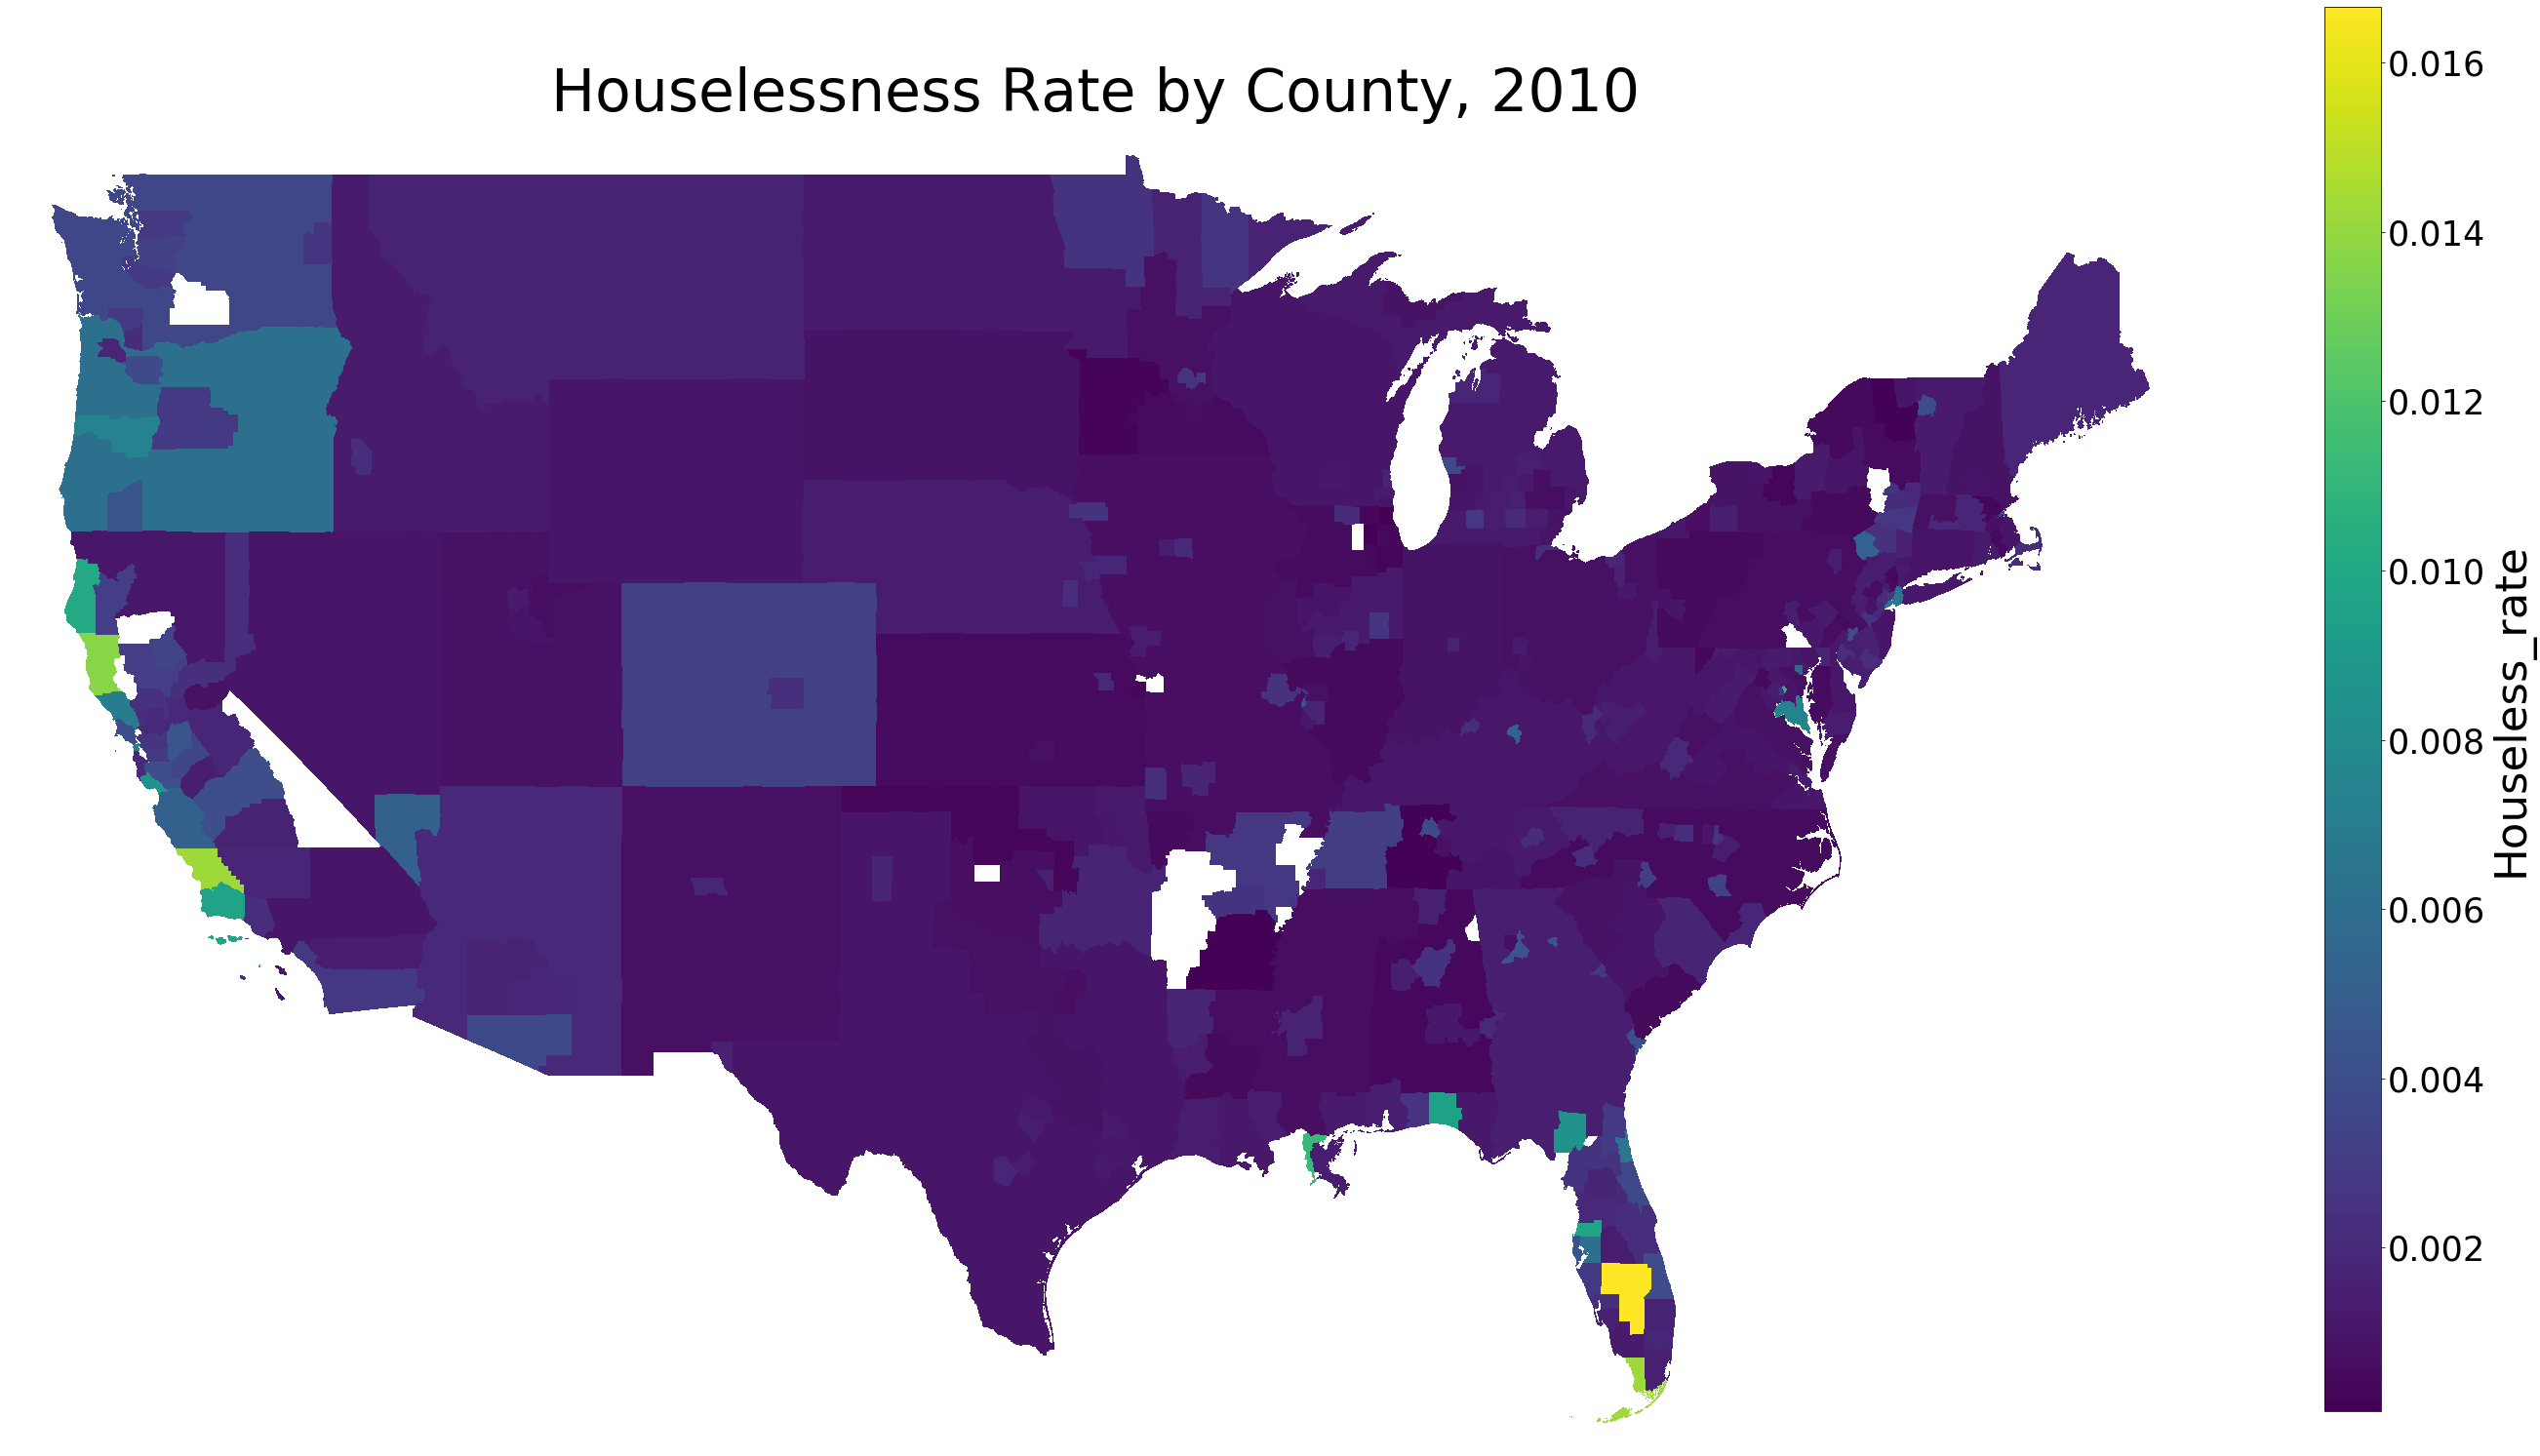

In [39]:
choropleth(df, 'Houseless_rate', '2010', "viridis", 'Houselessness Rate')

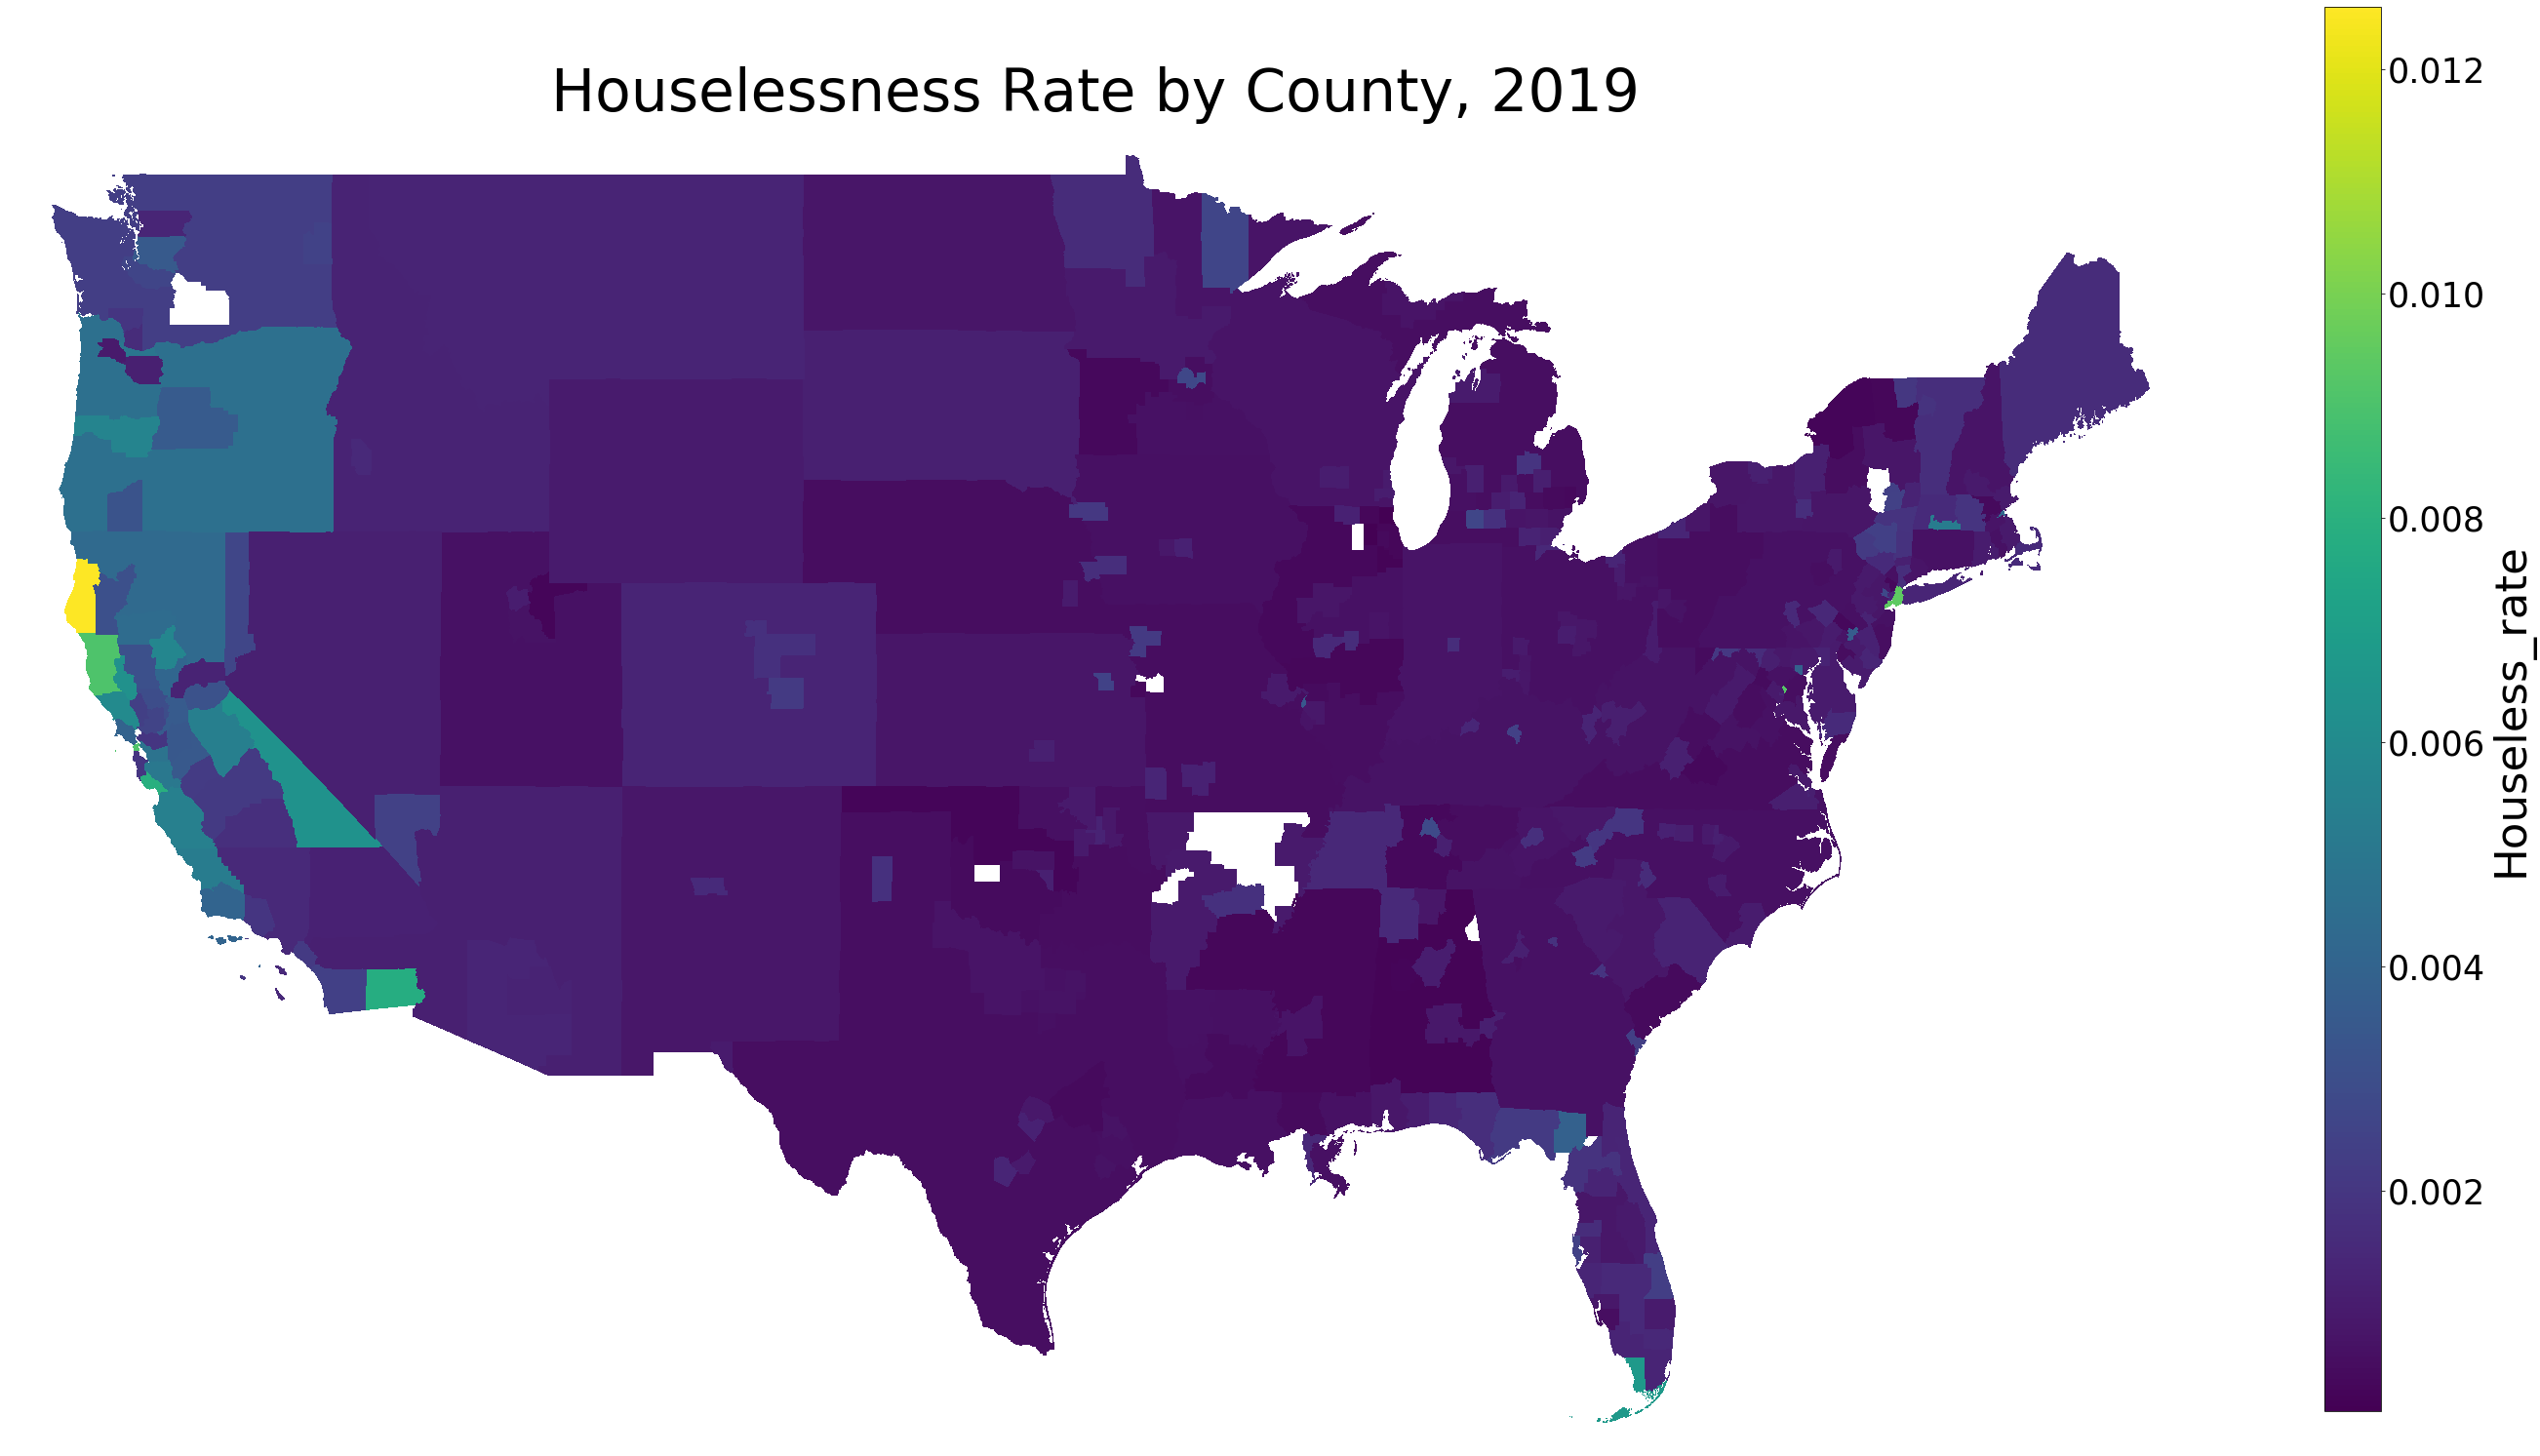

In [40]:
choropleth(df, 'Houseless_rate', '2019', 'viridis', 'Houselessness Rate')

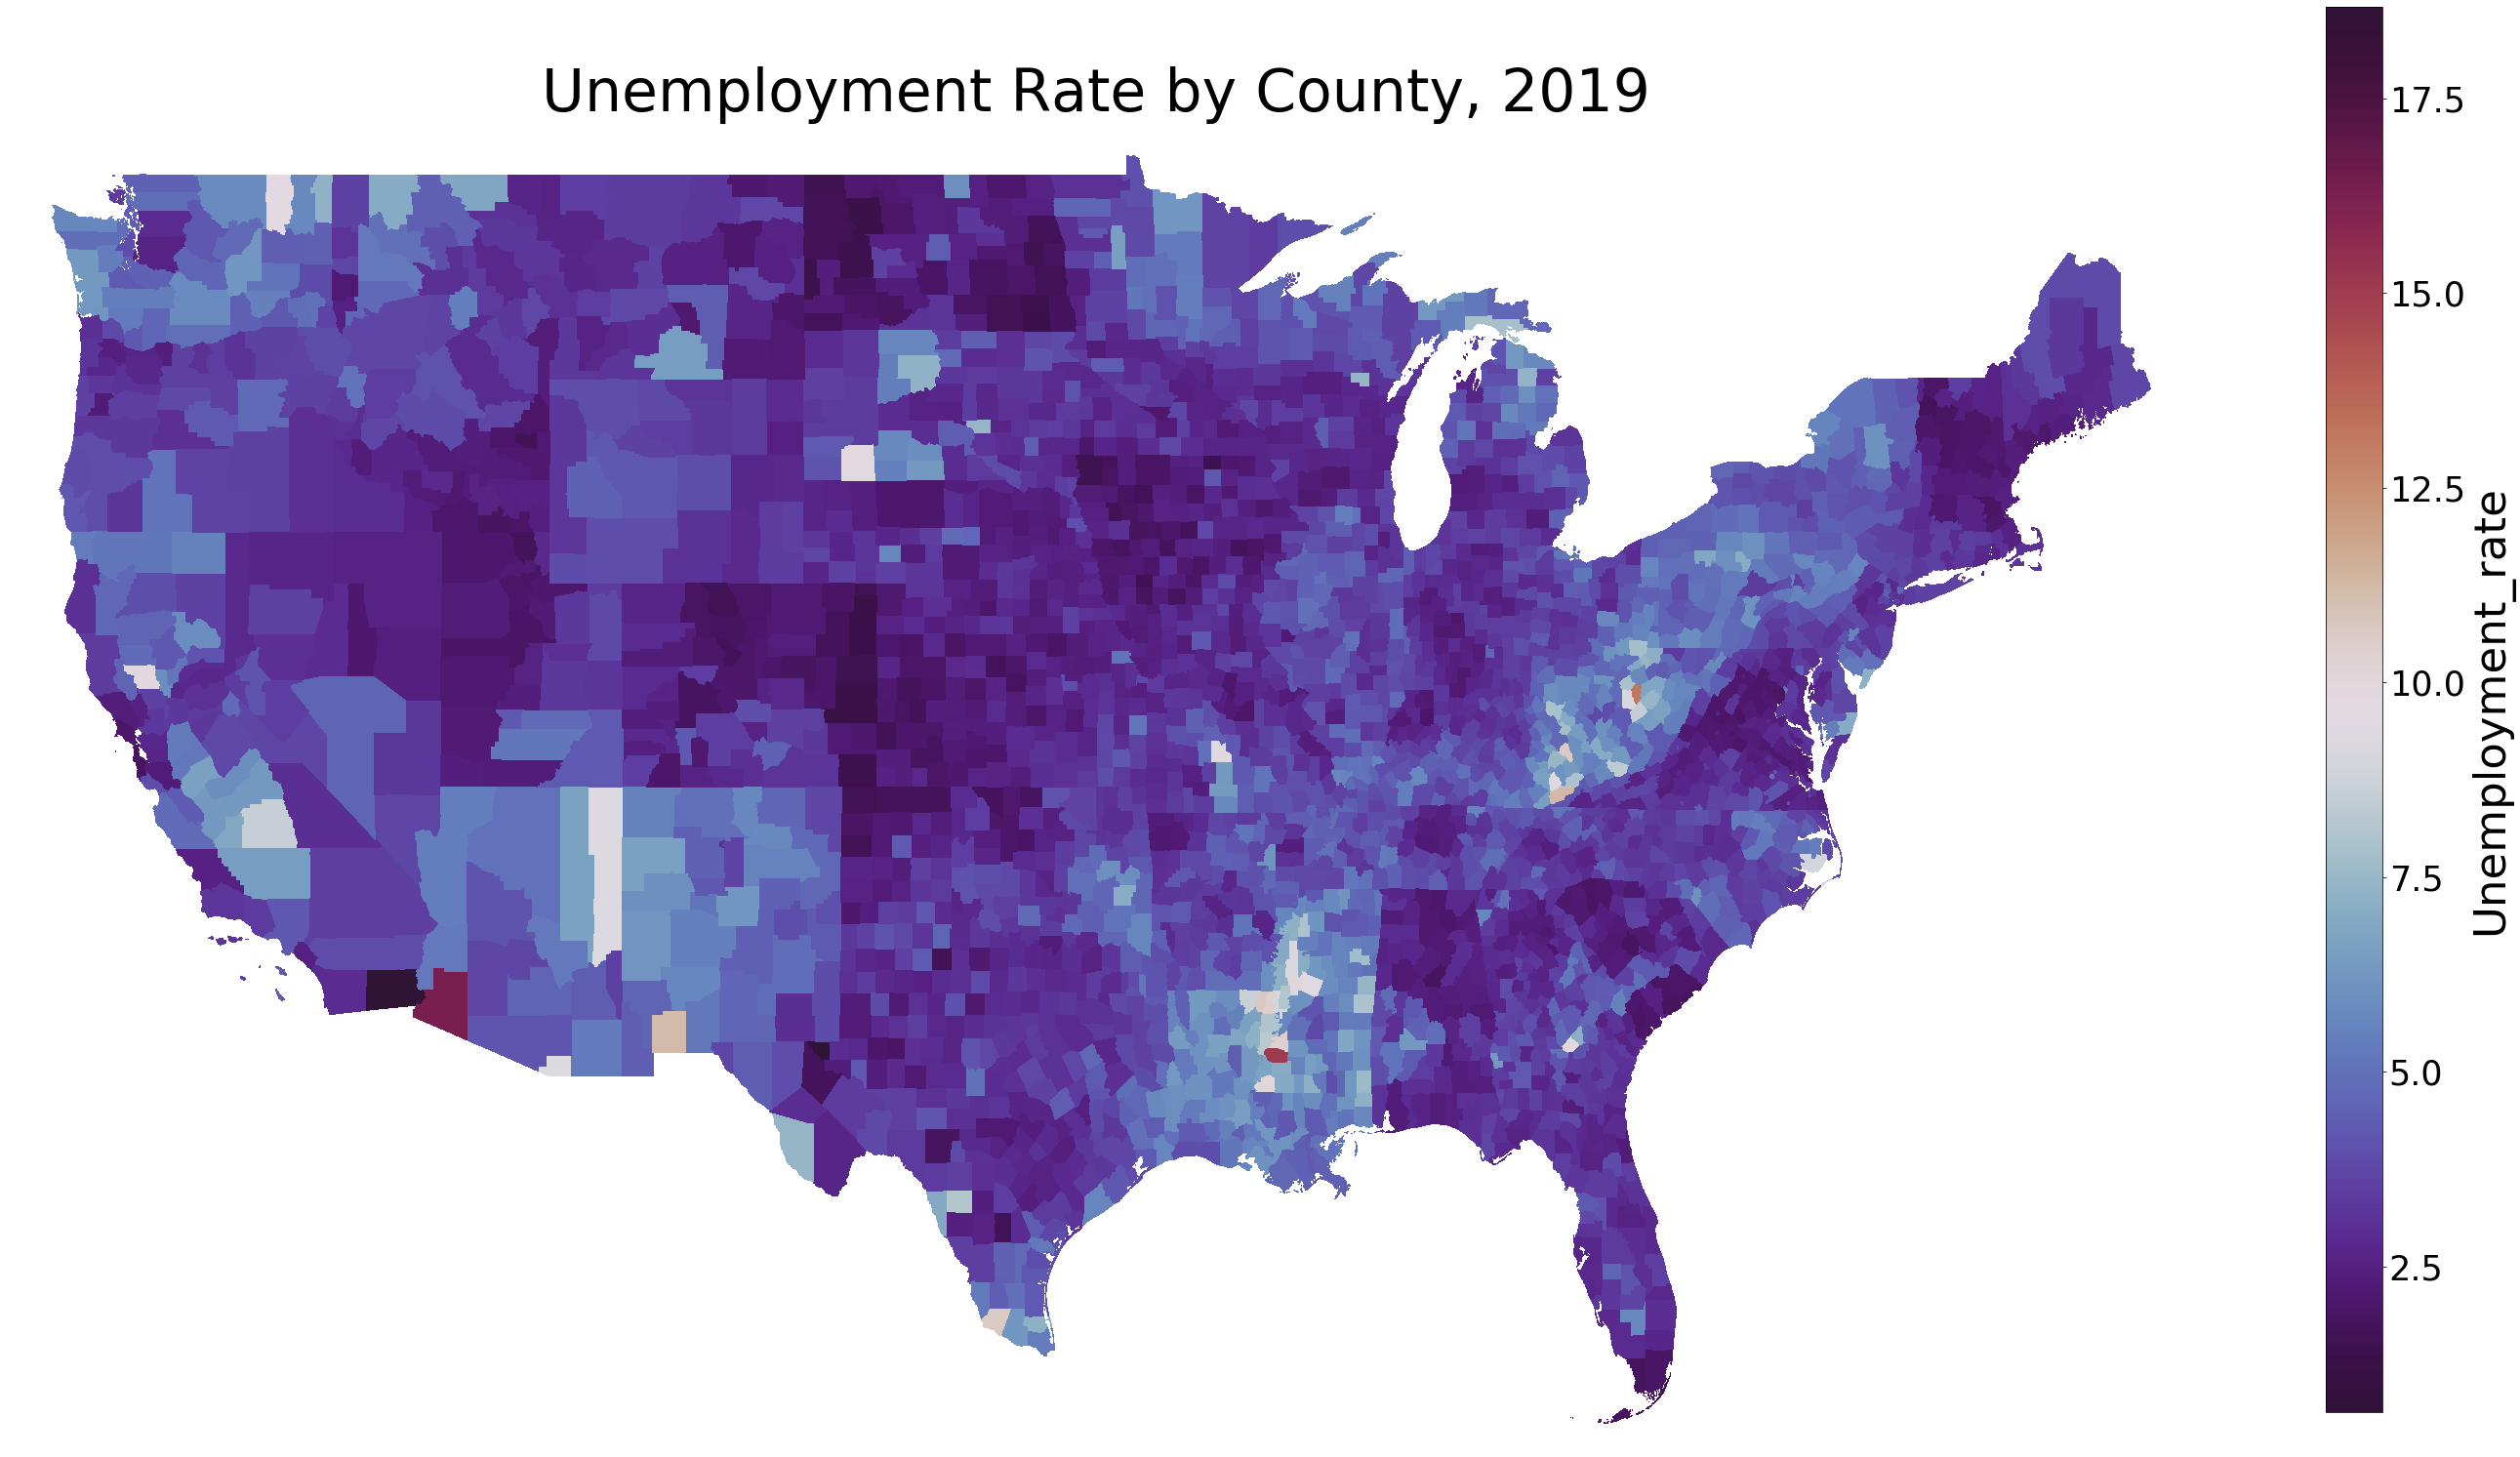

In [38]:
choropleth(df, 'Unemployment_rate', '2019', 'twilight_shifted', title='Unemployment Rate')
choropleth(df, 'Unemployment_rate', '2020', 'twilight_shifted',title='Unemployment Rate')

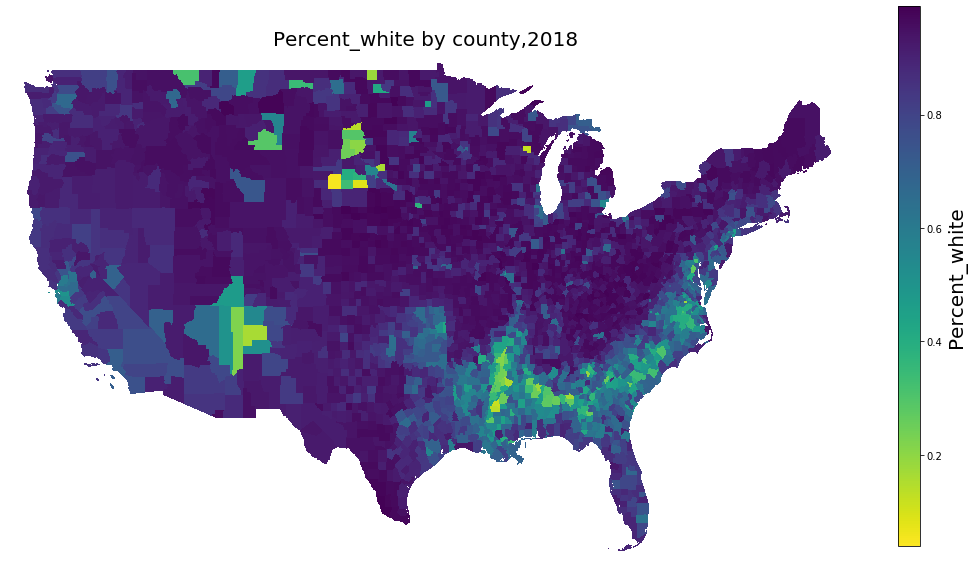

In [258]:
choropleth(df, 'Percent_white', '2010', 'viridis_r', 'White Population Percentage')
choropleth(df, 'Percent_white', '2018', 'viridis_r', 'White Population Percentage')

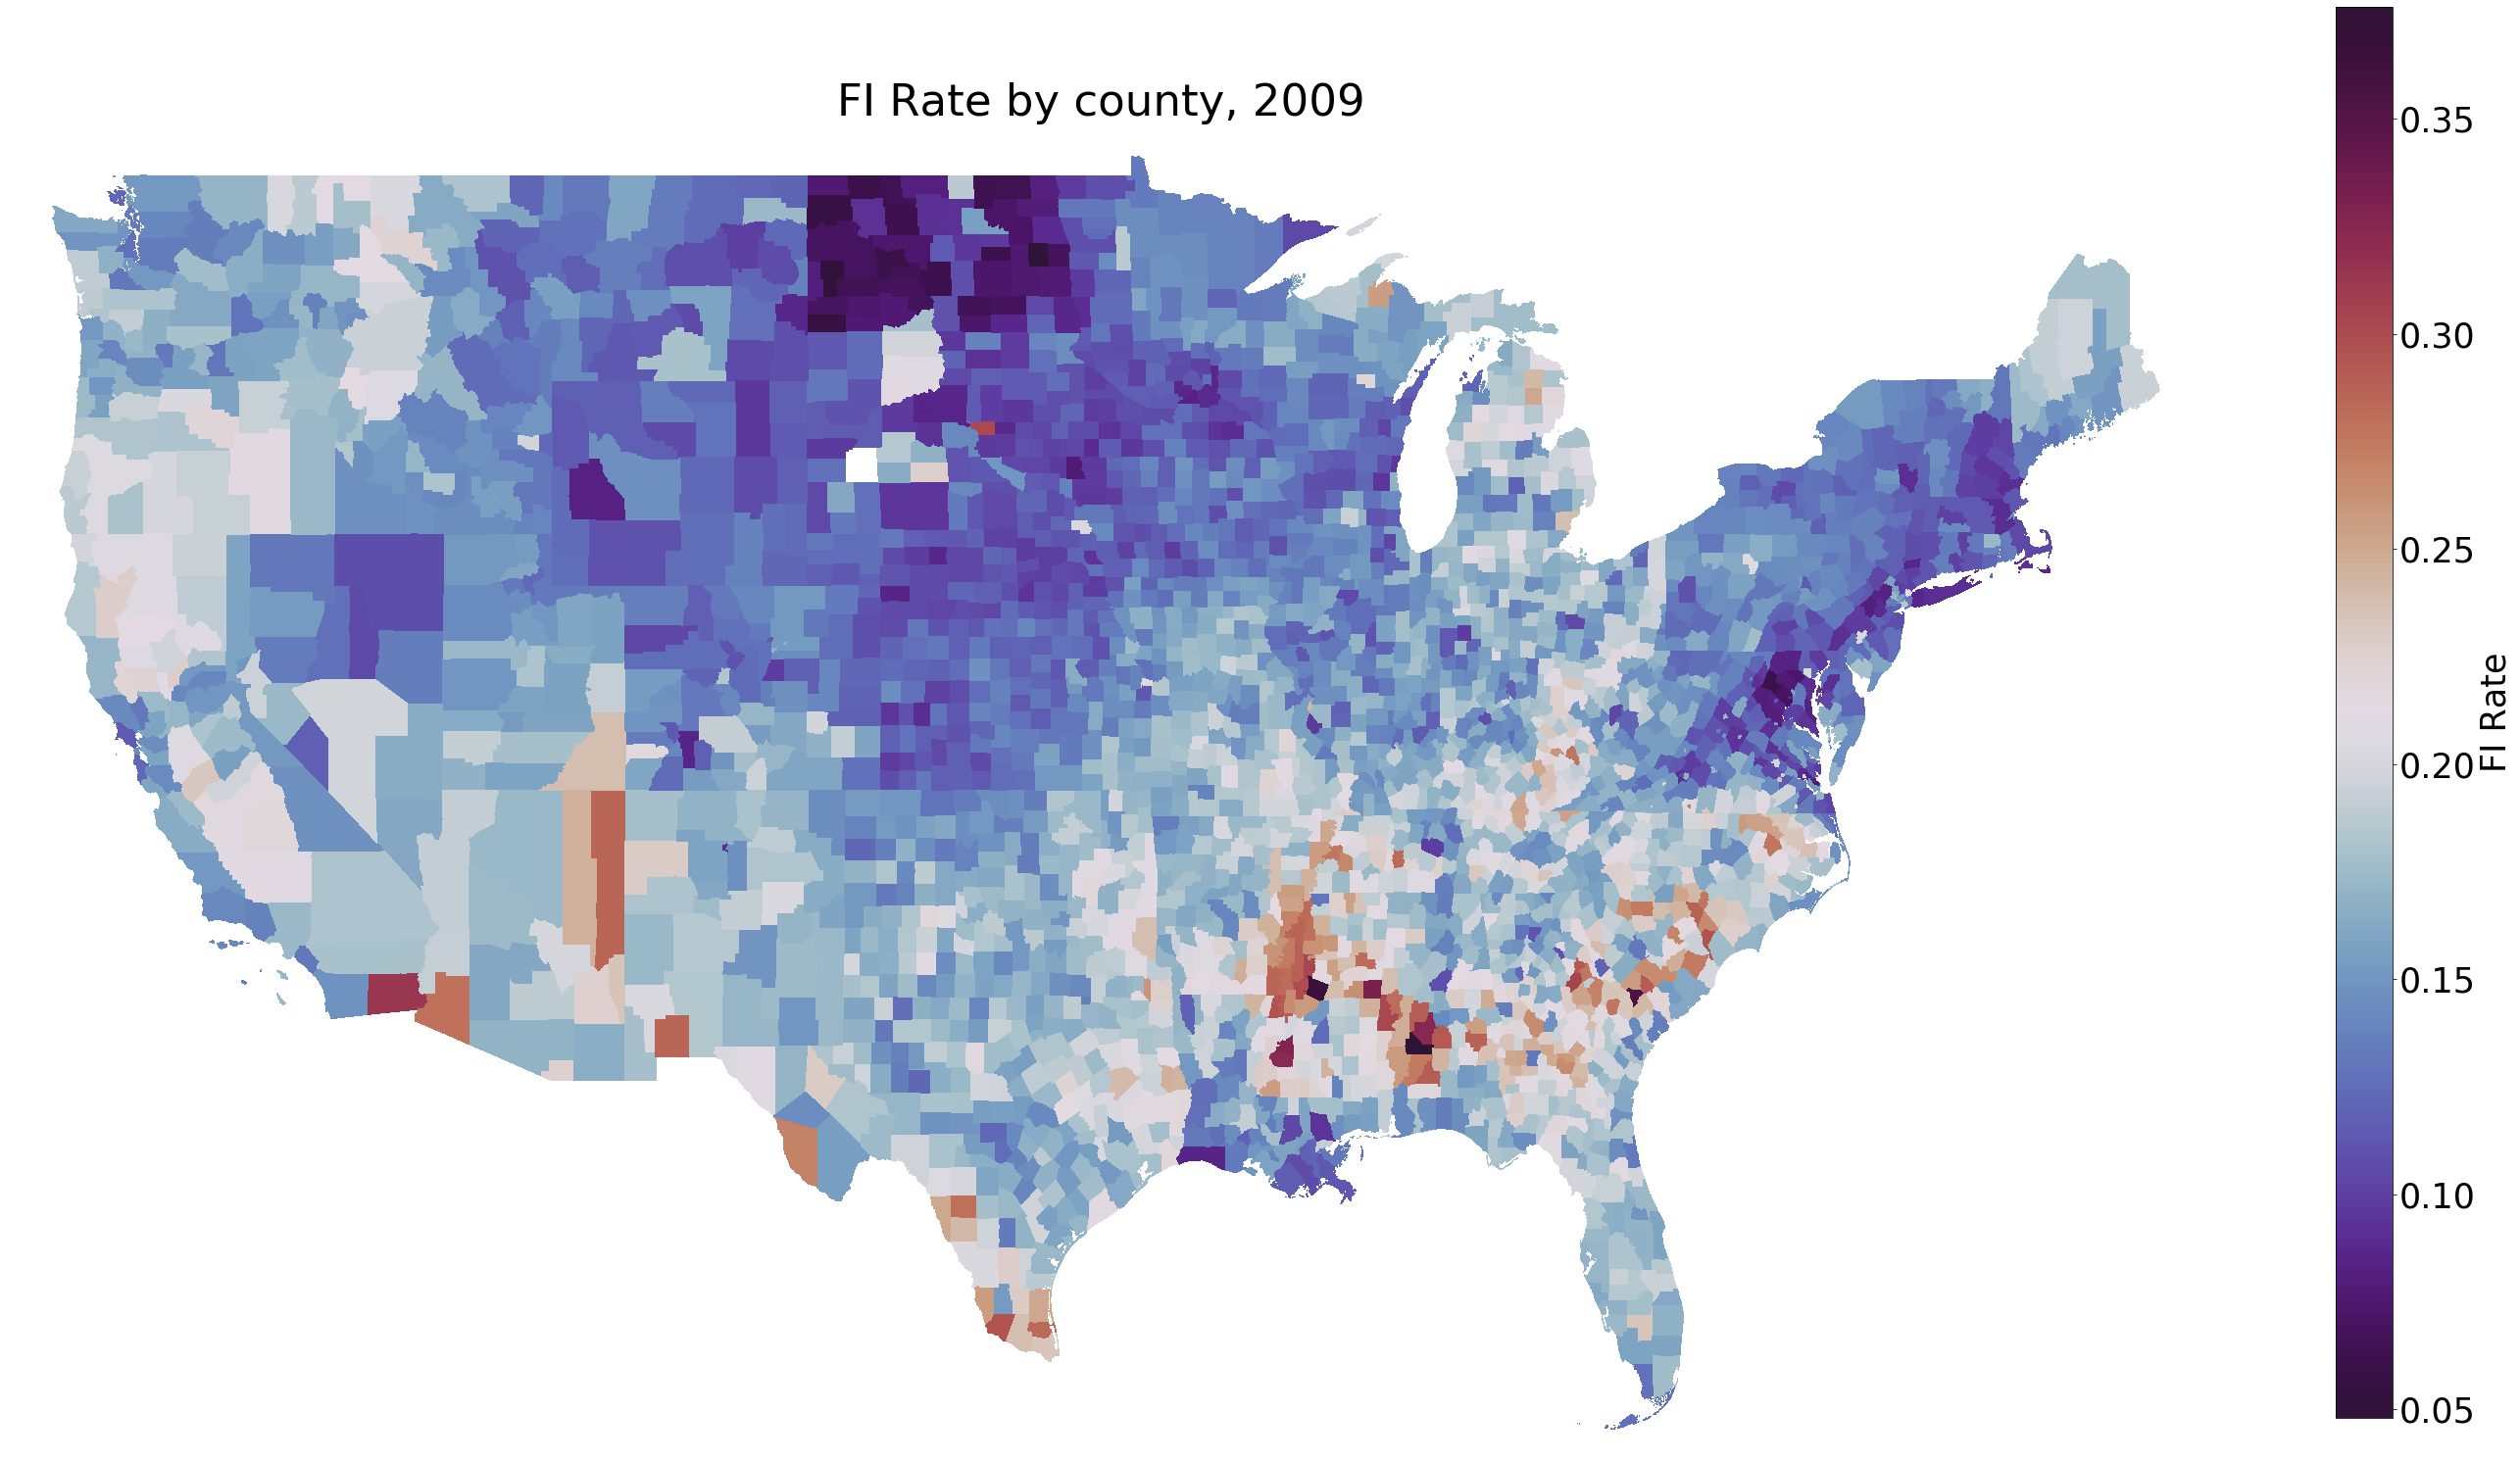

In [280]:
choropleth(df, 'FI Rate', '2009', 'twilight_shifted', 'Food Insecurity Rate')
choropleth(df, 'FI Rate', '2018', 'twilight_shifted', 'Food Insecurity Rate')

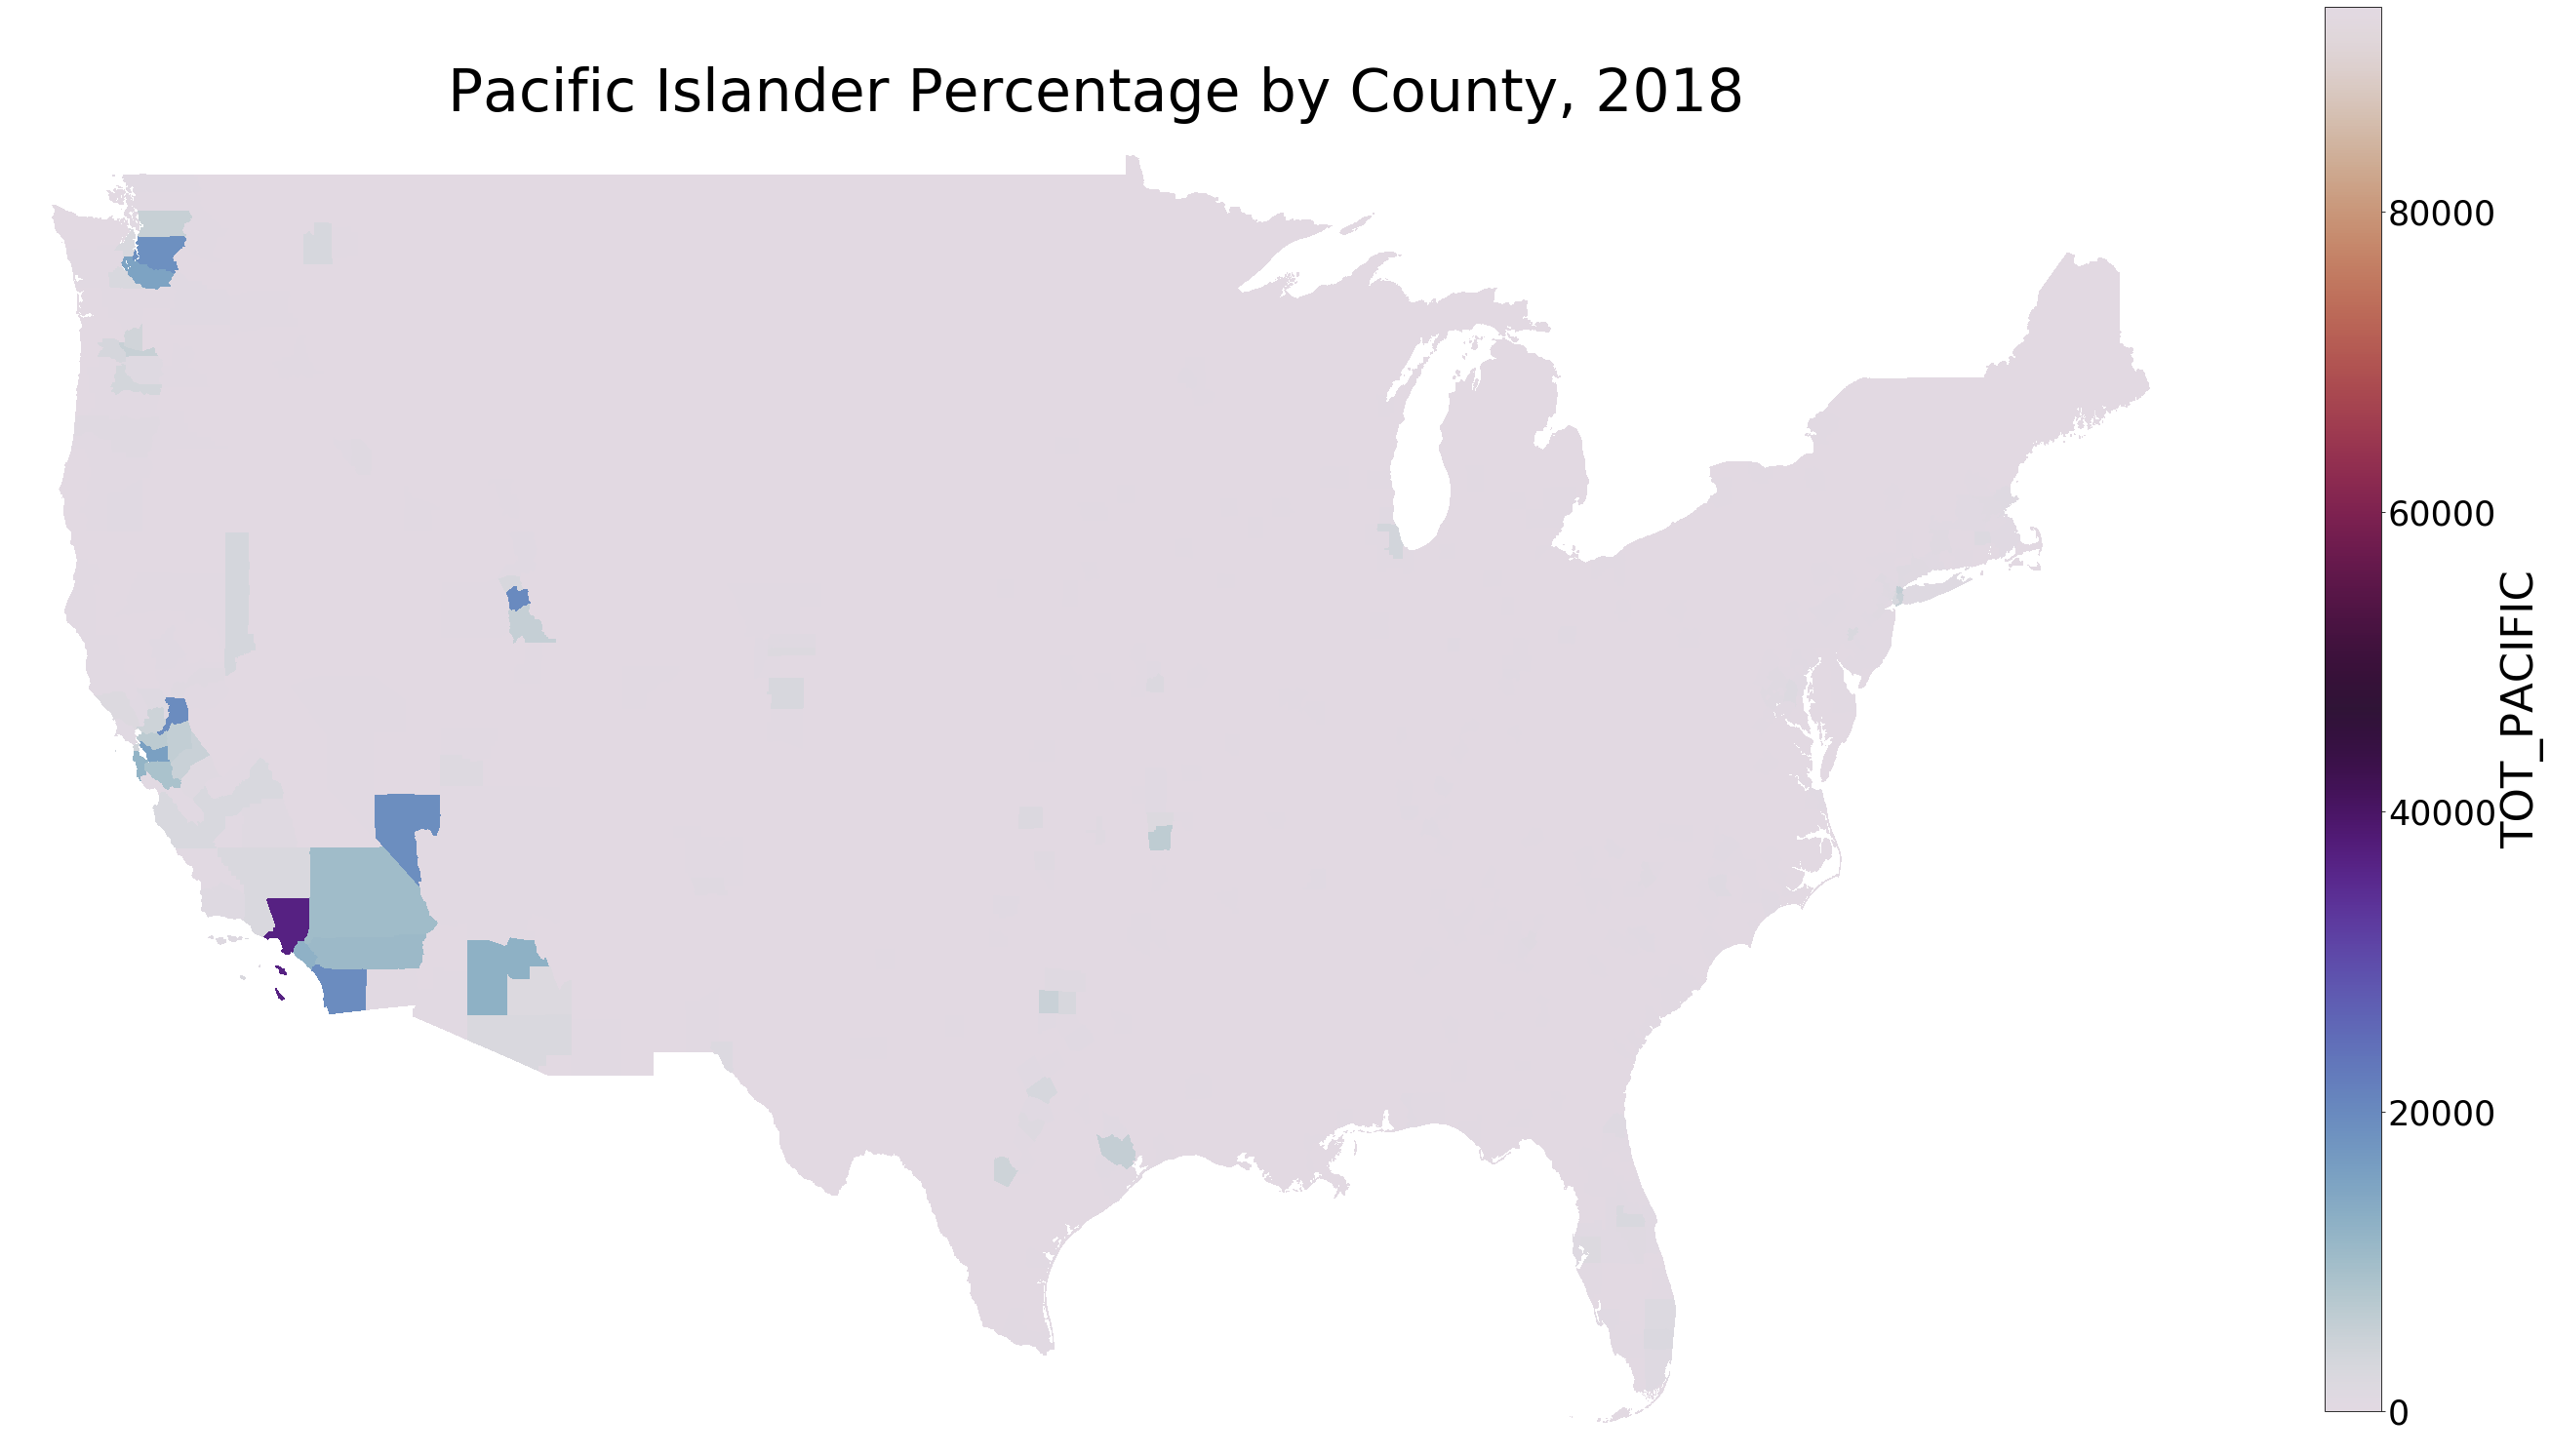

In [36]:
choropleth(df, 'TOT_PACIFIC', '2018', 'twilight',title='Pacific Islander Percentage')

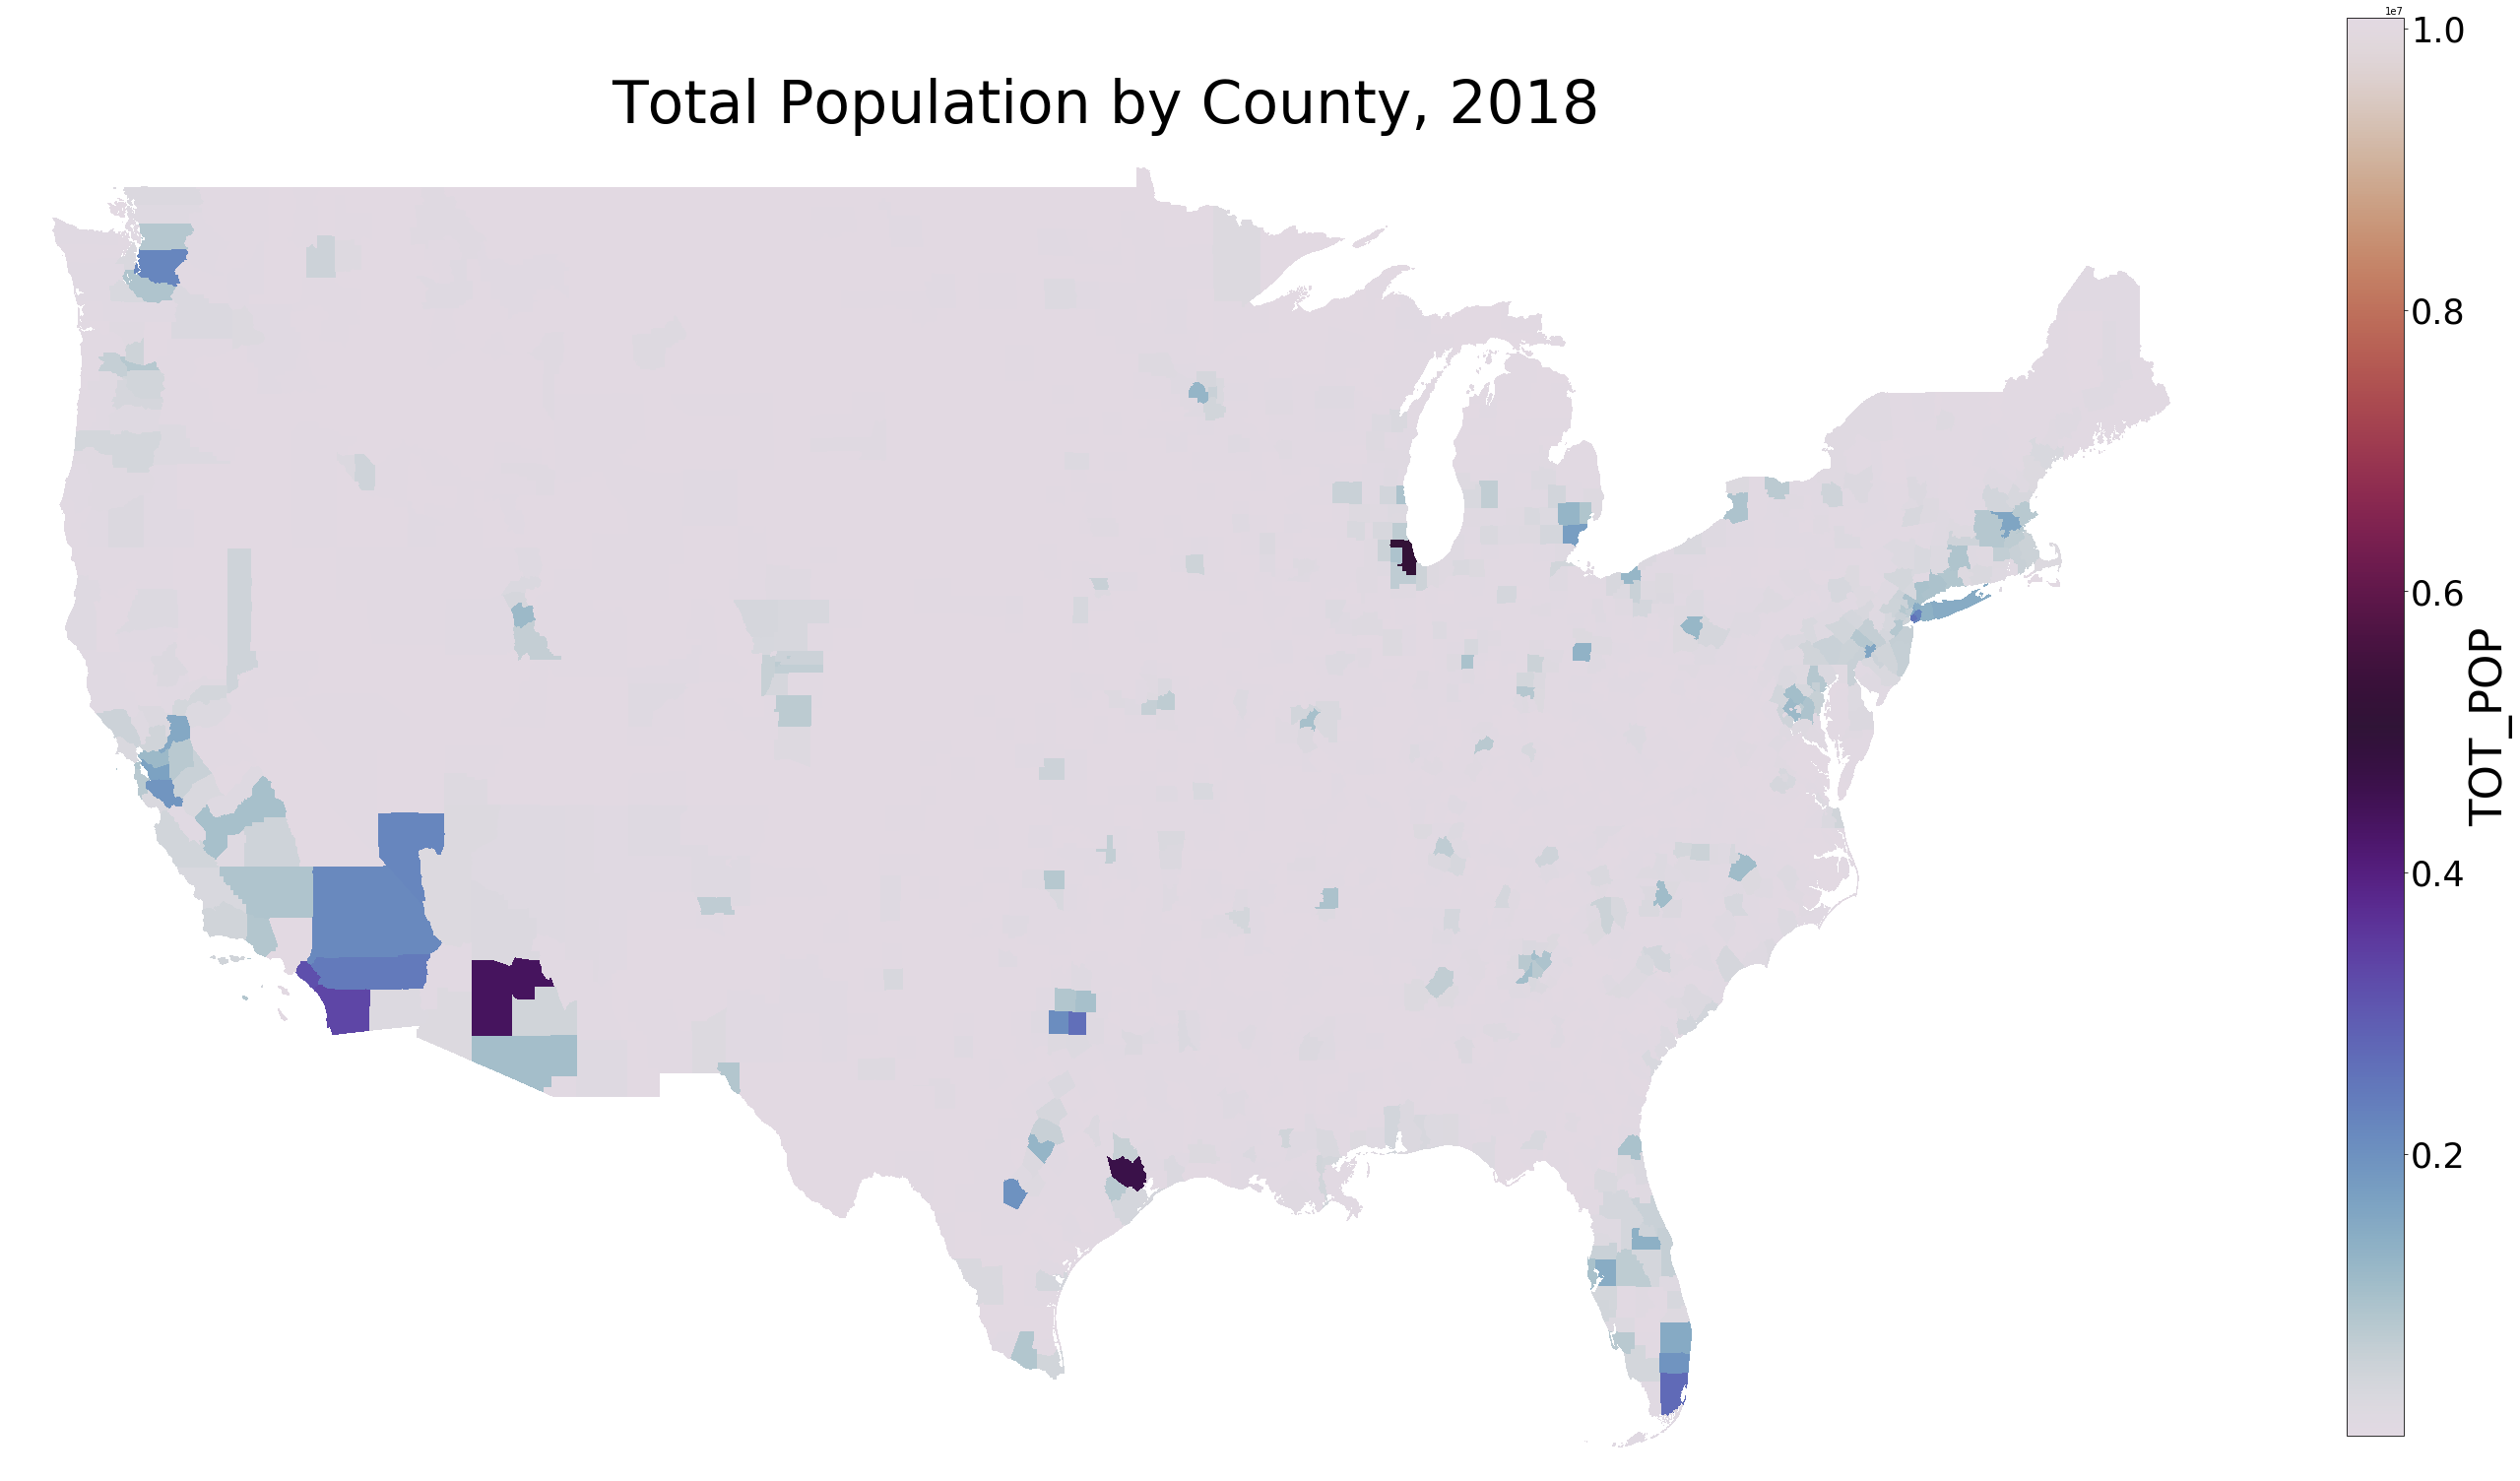

In [34]:
choropleth(df, 'TOT_POP', '2018', 'twilight',title='Total Population')

In [37]:
def choropleth(df, feature, year, cmap, title=None):
    '''sdf '''
    
    map_df = df[df.Year == year]
    # Read shapefile using Geopandas
    shape_df = gpd.read_file('../datasets/shapefile/cb_2018_us_county_500k.shp')
    geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
    
    fig, ax = plt.subplots(figsize = (40,40))
    vmin = geo_df[feature].min()
    vmax = geo_df[feature].max()
    geo_df.plot(ax=ax, column =feature, cmap=cmap, legend = False,antialiased=False)
    if title:
        ax.set_title(title+" by County, "+year, fontdict={'fontsize': 60}, loc='center')
    else:
        ax.set_title(feature+", "+year, fontdict={'fontsize': 60}, loc='center')
    ax.set(xlim=(-126, -66), ylim=(24, 50));
    plt.xticks([], [])
    plt.yticks([], [])
    cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax)
    cbr.set_label(feature, size=45)
    cbr.ax.tick_params(labelsize=35) 
    ax.set_axis_off()
    # ax.annotate("__Optional Annotation__", xy=(0.25, .1), size=20, xycoords='figure fraction')
    # plt.savefig('population.png',format = 'png',bbox_inches='tight')

# Question 3: How does food insecurity rate relate to each of the other features?

In [228]:
df.sample(2)

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,TOT_LATINX,State/County,FI Rate,Low Threshold Type,High Threshold Type,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_latinX,Percent_working,Total_food_retail,Food_retail_per_person,Rent^2,Houseless_rate^2,Sheltered_rate^2,Unsheltered_rate^2,TOT_POP^2,Cost Per Meal^2,Num_wholesale^2,Num_restaraunts^2,Num_grocery^2,Unemployment_rate^2,Percent_male^2,Percent_female^2,Percent_white^2,Percent_Black^2,Percent_native^2,Percent_asian^2,Percent_pacific^2,Percent_working^2,Total_food_retail^2,Food_retail_per_person^2
674664,39123,NaN,2018,OH-507,0.000505,0.000403,0.000102,Ohio,Ottawa County,40769.0,20231.0,20538.0,39555.0,386.0,108.0,141.0,18.0,2111.0,"Ottawa County, OH",0.128,SNAP,Other Nutrition Program,3.18000,12.0,492.0,85.0,21096.0,19773.0,1323.0,6.3,0.496235,0.503765,0.970222,0.009468,0.002649,0.003459,0.000442,0.05178,0.517452,589.0,0.014447,NaN,2.546562e-07,1.621487e-07,1.039539e-08,1.662111e+09,10.112400,144.0,242064.0,7225.0,39.69,0.246249,0.253779,0.941332,0.00009,0.000007,0.000012,1.949328e-07,0.267757,346921.0,0.000209
916687,05127,NaN,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scott County, AR",0.184,SNAP,other nutrition pgm,2.58572,NaN,NaN,NaN,4913.0,4577.0,336.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.685948,NaN,NaN,NaN,46.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


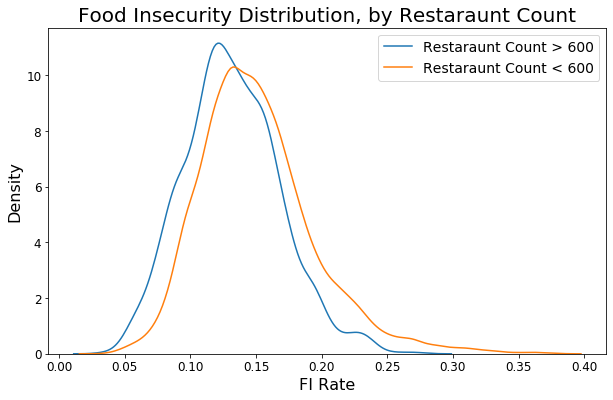

In [244]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Num_restaraunts'] >df['Num_restaraunts'].mean()], label= 'Restaraunt Count > 600', hist=False);
ax = sns.distplot(df['FI Rate'][df['Num_restaraunts'] < df['Num_restaraunts'].mean()], label= 'Restaraunt Count < 600', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Restaraunt Count', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

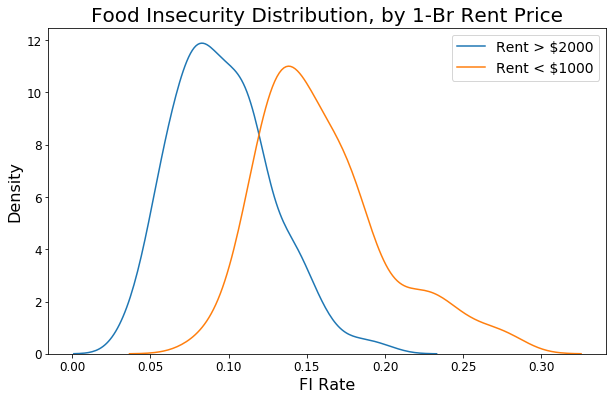

In [247]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Rent'] >2000], label= 'Rent > $2000', hist=False);
ax = sns.distplot(df['FI Rate'][df['Rent'] < 1000], label= 'Rent < $1000', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by 1-Br Rent Price', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

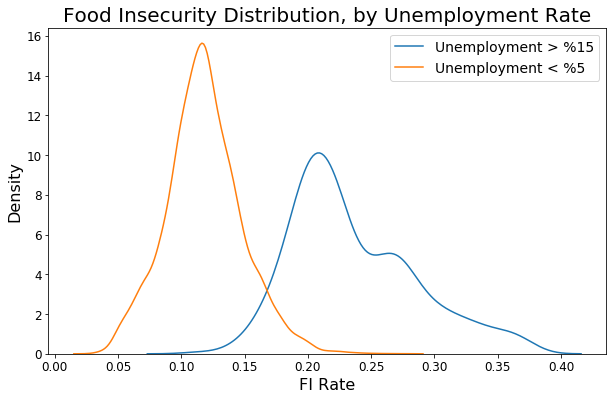

In [250]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Unemployment_rate'] >15], label= 'Unemployment > %15', hist=False);
ax = sns.distplot(df['FI Rate'][df['Unemployment_rate'] < 5], label= 'Unemployment < %5', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Unemployment Rate', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

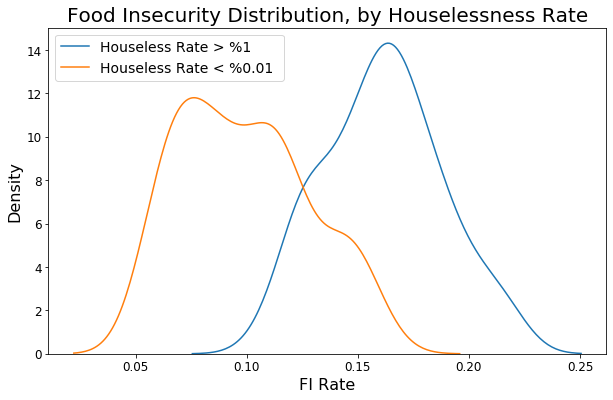

In [222]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Houseless_rate'] >.01], label= 'Houseless Rate > %1', hist=False);
ax = sns.distplot(df['FI Rate'][df['Houseless_rate'] < .0001], label= 'Houseless Rate < %0.01 ', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Houselessness Rate', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

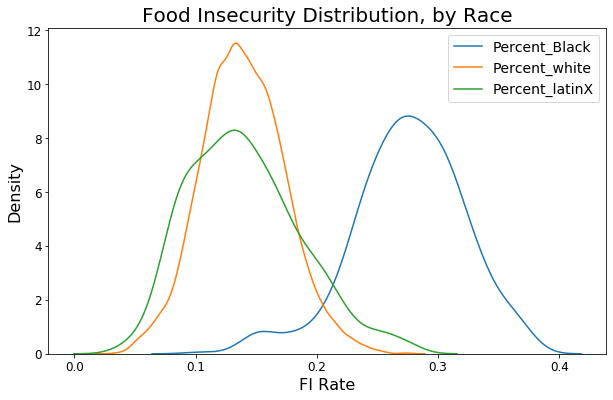

In [198]:
plt.figure(figsize=(10, 6));
for feat in ['Percent_Black', 'Percent_white', 'Percent_latinX']:
    ax = sns.distplot(df['FI Rate'][df[feat] > .6], label= feat, hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Race', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

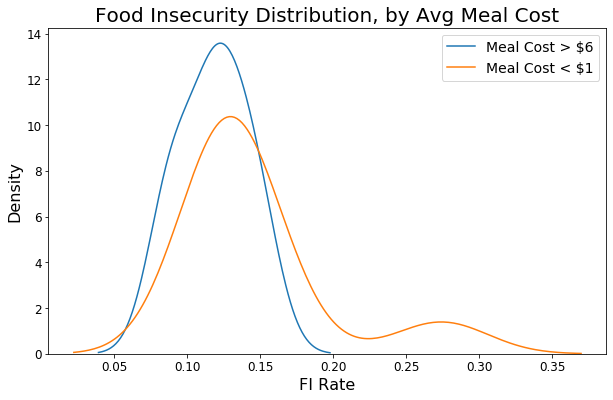

In [263]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Cost Per Meal'] > 6], label= 'Meal Cost > $6', hist=False);
ax = sns.distplot(df['FI Rate'][df['Cost Per Meal'] < 1], label= 'Meal Cost < $1', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Avg Meal Cost', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);